<a href="https://colab.research.google.com/github/alik604/MNIST_Brain/blob/master/MNIST_Brain_colab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
! pip install dask
import dask.dataframe as dd
import dask

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
raw = pd.read_csv('https://raw.githubusercontent.com/alik604/MNIST_Brain/master/MW-sample.csv',low_memory=False,header= None)

# df = dd.read_csv('./MW.csv')
# df.describe()

FILE FORMAT:

The data is stored in a very simple text format including:

[id]: a numeric, only for reference purposes.

[event] id, a integer, used to distinguish the same event captured at different brain locations, used only by multichannel devices (all except MW).

[device]: a 2 character string, to identify the device used to capture the signals, "MW" for MindWave....

[channel]: a string, to indentify the 10/20 brain location of the signal ....MindWave "FP1"

[code]: a integer, to indentify the digit been thought/seen, with possible values 0,1,2,3,4,5,6,7,8,9 or -1 for random captured signals not related to any of the digits.

[size]: a integer, to identify the size in number of values captured in the 2 seconds of this signal, since the Hz of each device varies, in "theory" the value is close to 512Hz for MW, 128Hz for EP, 220Hz for MU & 128Hz for IN, for each of the 2 seconds.

[data]: a coma separated set of numbers, with the time-series amplitude of the signal, each device uses a different precision to identify the electrical potential captured from the brain: integers in the case of MW & MU or real numbers in the case of EP & IN.

There is no headers in the files,  every line is  a signal, and the fields are separated by a tab

In [3]:
raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951
0,0\t0\tMW\tFP1\t0\t1017\t38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,24,38,56,57,52,52,48,37,39,51,51,40,37,34,27,25,23,21,25,37,43,45,53,57,...,27,21,23,27,29,25,20,22,26,22,25,29,17,2,-6,-5,-2,-9,-11,-9,-4,4,17,29,33,28,28,35,40,58,82,96,92,92,103,118,136,146,145,134
1,4278\t4278\tMW\tFP1\t0\t952\t348,329,297,274,268,272,261,240,217,210,208,211,215,230,245,232,230,246,258,258,251,260,272,265,250,240,234,216,189,199,256,331,400,418,395,380,402,426,436,428,...,-1075,-1014,-974,-930,-886,-856,-839,-830,-825,-806,-785,-778,-780,-774,-758,-749,-791,-828,-805,-650,-318,26,269,444,616,821,1033,1204,1313,1361,1356,1321,1288,1283,1305,1350,1396,1432,1421,1369
2,15001\t15001\tMW\tFP1\t8\t1017\t82,64,40,35,45,65,70,69,61,53,50,43,36,36,38,36,33,33,35,41,39,45,60,57,36,18,21,32,34,36,52,64,64,49,40,40,40,37,32,27,...,76,70,68,75,85,96,114,133,138,136,137,135,140,170,211,246,282,327,363,394,424,469,531,572,601,646,696,744,779,807,844,887,919,929,906,888,890,891,876,854
3,1972\t1972\tMW\tFP1\t8\t1015\t83,92,105,122,140,151,148,141,141,154,178,200,213,210,197,189,211,236,251,256,245,232,233,256,263,235,198,188,213,232,232,228,232,236,229,220,215,215,202,185,...,42,52,60,58,48,38,36,41,53,57,52,44,58,74,91,113,119,128,146,160,148,139,150,164,179,193,208,220,232,236,249,291,356,416,457,491,544,634,738,808
4,13564\t13564\tMW\tFP1\t6\t953\t-809,-849,-893,-922,-922,-917,-931,-955,-973,-981,-981,-969,-961,-955,-931,-885,-844,-814,-787,-755,-714,-681,-652,-632,-613,-586,-557,-538,-531,-521,-493,-452,-417,-393,-376,-353,-321,-298,-280,-246,...,8,18,12,5,9,10,8,17,27,26,23,21,21,25,27,36,44,54,70,84,85,107,171,246,309,373,439,509,568,631,690,723,739,754,772,779,774,769,772,788


In [4]:
# https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns
tmp = raw[0].str.split('\t').tolist()[:-1] # [:-1] means exclude last
df = pd.DataFrame(tmp,columns = ["id", "event" , "device" , "channel" , "code" , "size" , "0"] )
df.head(3)

,id,event,device,channel,code,size,0
0,0,0,MW,FP1,0,1017,38
1,4278,4278,MW,FP1,0,952,348
2,15001,15001,MW,FP1,8,1017,82


In [5]:
to_concat = raw[:-1].drop(0,axis=1)
to_concat.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951
0,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,24,38,56,57,52,52,48,37,39,51,51,40,37,34,27,25,23,21,25,37,43,45,53,57,60,...,27,21,23,27,29,25,20,22,26,22,25,29,17,2,-6,-5,-2,-9,-11,-9,-4,4,17,29,33,28,28,35,40,58,82,96,92,92,103,118,136,146,145,134
1,329,297,274,268,272,261,240,217,210,208,211,215,230,245,232,230,246,258,258,251,260,272,265,250,240,234,216,189,199,256,331,400,418,395,380,402,426,436,428,397,...,-1075,-1014,-974,-930,-886,-856,-839,-830,-825,-806,-785,-778,-780,-774,-758,-749,-791,-828,-805,-650,-318,26,269,444,616,821,1033,1204,1313,1361,1356,1321,1288,1283,1305,1350,1396,1432,1421,1369
2,64,40,35,45,65,70,69,61,53,50,43,36,36,38,36,33,33,35,41,39,45,60,57,36,18,21,32,34,36,52,64,64,49,40,40,40,37,32,27,26,...,76,70,68,75,85,96,114,133,138,136,137,135,140,170,211,246,282,327,363,394,424,469,531,572,601,646,696,744,779,807,844,887,919,929,906,888,890,891,876,854


In [6]:
data = pd.concat([df,to_concat], axis =1)
data = data.drop(['device','channel'],axis =1)
data.head()

,id,event,code,size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951
0,0,0,0,1017,38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,24,38,56,57,52,52,48,37,39,51,51,40,37,34,27,25,23,21,25,37,...,27,21,23,27,29,25,20,22,26,22,25,29,17,2,-6,-5,-2,-9,-11,-9,-4,4,17,29,33,28,28,35,40,58,82,96,92,92,103,118,136,146,145,134
1,4278,4278,0,952,348,329,297,274,268,272,261,240,217,210,208,211,215,230,245,232,230,246,258,258,251,260,272,265,250,240,234,216,189,199,256,331,400,418,395,380,...,-1075,-1014,-974,-930,-886,-856,-839,-830,-825,-806,-785,-778,-780,-774,-758,-749,-791,-828,-805,-650,-318,26,269,444,616,821,1033,1204,1313,1361,1356,1321,1288,1283,1305,1350,1396,1432,1421,1369
2,15001,15001,8,1017,82,64,40,35,45,65,70,69,61,53,50,43,36,36,38,36,33,33,35,41,39,45,60,57,36,18,21,32,34,36,52,64,64,49,40,40,...,76,70,68,75,85,96,114,133,138,136,137,135,140,170,211,246,282,327,363,394,424,469,531,572,601,646,696,744,779,807,844,887,919,929,906,888,890,891,876,854
3,1972,1972,8,1015,83,92,105,122,140,151,148,141,141,154,178,200,213,210,197,189,211,236,251,256,245,232,233,256,263,235,198,188,213,232,232,228,232,236,229,220,...,42,52,60,58,48,38,36,41,53,57,52,44,58,74,91,113,119,128,146,160,148,139,150,164,179,193,208,220,232,236,249,291,356,416,457,491,544,634,738,808
4,13564,13564,6,953,-809,-849,-893,-922,-922,-917,-931,-955,-973,-981,-981,-969,-961,-955,-931,-885,-844,-814,-787,-755,-714,-681,-652,-632,-613,-586,-557,-538,-531,-521,-493,-452,-417,-393,-376,-353,...,8,18,12,5,9,10,8,17,27,26,23,21,21,25,27,36,44,54,70,84,85,107,171,246,309,373,439,509,568,631,690,723,739,754,772,779,774,769,772,788


### Droped 'device' and 'channel', since they are of not in use. this dataset is single channel
... I am using *MindWave*

## Now its time to give a shit about the data we are working with... rather than treating it as 'just data'

[event]: id, a integer, used to distinguish the same event captured at different brain locations, used only by multichannel devices (all except MW).

[size]: a integer, to identify the size in number of values captured in the 2 seconds of this signal, since the Hz of each device varies, in "theory" the value is close to 512Hz for MW, 128Hz for EP, 220Hz for MU & 128Hz for IN, for each of the 2 seconds.

[data]: a coma separated set of numbers, with the time-series amplitude of the signal, each device uses a different precision to identify the electrical potential captured from the brain: integers in the case of MW & MU or real numbers in the case of EP & IN.

## I have truncated the data in excel to make it square (not a *jagged* array) 
* event is of no use
* size appears to be of non use 
* I see no point in keeping ID 

**I have no clue what to do with [data]...**


[data - proper definition]: a time-series signal, where the y-axis is the voltage.... its that fucking simple, no need for big words 

**I'm going back and labeling *data* as 0**

In [7]:
df = data.drop(['id','event','size'],axis =1)
df.head(10)

,code,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951
0,0,38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,24,38,56,57,52,52,48,37,39,51,51,40,37,34,27,25,23,21,25,37,43,45,53,...,27,21,23,27,29,25,20,22,26,22,25,29,17,2,-6,-5,-2,-9,-11,-9,-4,4,17,29,33,28,28,35,40,58,82,96,92,92,103,118,136,146,145,134
1,0,348,329,297,274,268,272,261,240,217,210,208,211,215,230,245,232,230,246,258,258,251,260,272,265,250,240,234,216,189,199,256,331,400,418,395,380,402,426,436,...,-1075,-1014,-974,-930,-886,-856,-839,-830,-825,-806,-785,-778,-780,-774,-758,-749,-791,-828,-805,-650,-318,26,269,444,616,821,1033,1204,1313,1361,1356,1321,1288,1283,1305,1350,1396,1432,1421,1369
2,8,82,64,40,35,45,65,70,69,61,53,50,43,36,36,38,36,33,33,35,41,39,45,60,57,36,18,21,32,34,36,52,64,64,49,40,40,40,37,32,...,76,70,68,75,85,96,114,133,138,136,137,135,140,170,211,246,282,327,363,394,424,469,531,572,601,646,696,744,779,807,844,887,919,929,906,888,890,891,876,854
3,8,83,92,105,122,140,151,148,141,141,154,178,200,213,210,197,189,211,236,251,256,245,232,233,256,263,235,198,188,213,232,232,228,232,236,229,220,215,215,202,...,42,52,60,58,48,38,36,41,53,57,52,44,58,74,91,113,119,128,146,160,148,139,150,164,179,193,208,220,232,236,249,291,356,416,457,491,544,634,738,808
4,6,-809,-849,-893,-922,-922,-917,-931,-955,-973,-981,-981,-969,-961,-955,-931,-885,-844,-814,-787,-755,-714,-681,-652,-632,-613,-586,-557,-538,-531,-521,-493,-452,-417,-393,-376,-353,-321,-298,-280,...,8,18,12,5,9,10,8,17,27,26,23,21,21,25,27,36,44,54,70,84,85,107,171,246,309,373,439,509,568,631,690,723,739,754,772,779,774,769,772,788
5,8,-85,-24,34,48,6,-38,-41,-14,-4,-10,-11,-9,3,22,56,105,139,168,194,208,215,219,233,241,236,241,260,268,249,219,196,180,165,130,72,27,18,33,51,...,-18,-342,-660,-915,-1124,-1317,-1486,-1623,-1721,-1771,-1754,-1576,-1180,-730,-374,-108,129,395,672,902,1063,1141,1152,1121,1077,1036,1011,1013,1033,1043,1040,1030,1012,970,915,864,821,795,791,786
6,7,114,125,133,123,87,72,87,96,90,125,208,282,328,349,359,370,386,403,410,406,390,356,294,215,153,122,98,65,25,-18,-66,-87,-90,-113,-129,-121,-117,-105,-75,...,-152,-122,-26,103,164,109,24,1,37,82,103,164,256,282,210,130,116,145,153,164,264,406,450,358,247,202,228,281,308,306,278,209,119,84,194,391,554,658,722,774
7,4,-82,-62,-39,-9,17,23,28,37,52,60,59,64,56,49,41,33,32,29,21,2,2,34,66,73,68,83,90,76,65,56,65,65,51,27,19,25,32,24,18,...,-26,-38,-21,5,10,3,2,3,26,67,92,97,87,81,72,80,92,113,138,151,152,157,180,192,179,160,146,140,150,180,217,257,294,352,422,480,522,582,647,706
8,0,40,45,50,51,41,26,19,26,45,61,66,57,49,39,28,20,19,35,51,50,34,23,22,21,22,28,23,11,4,6,16,21,22,28,42,50,51,41,36,...,60,77,73,61,65,75,89,105,113,108,101,96,104,133,180,228,261,292,325,356,385,434,491,540,570,582,588,602,629,656,678,695,707,726,741,739,731,715,695,690
9,5,-39,-33,-25,-37,-54,-58,-49,-35,-19,42,112,122,93,65,48,50,57,52,34,20,34,59,69,71,70,80,97,108,105,89,59,37,27,34,39,50,64,71,93,...,-202,-188,-172,-162,-147,-126,-104,-85,-74,-68,-69,-69,-57,-51,-46,-51,-59,-61,-65,-61,-43,-23,-26,-29,-14,-4,-6,-4,5,27,70,113,211,344,451,522,580,626,658,680


In [0]:
X = df.drop(['code'],axis =1)
y = df.code

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.head()
y_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951
16081,44,44,51,57,58,60,66,66,52,44,49,56,66,58,44,45,58,57,42,38,45,58,65,55,42,41,55,75,91,86,69,69,85,97,87,72,58,44,25,17,...,19,-3,-5,2,12,22,33,33,26,33,35,32,34,39,35,32,27,32,38,32,25,24,27,24,23,35,49,64,65,42,18,25,42,38,38,49,43,28,16,10
17494,44,34,17,5,-3,0,11,16,16,13,12,9,-1,-11,-11,0,5,2,-1,1,2,-1,8,33,49,57,52,41,23,6,3,10,19,24,20,8,0,4,8,11,...,-7,-17,-23,-17,-5,-2,-4,-9,-6,-3,-2,5,10,9,-12,-37,-44,-34,-21,-29,-36,-24,-21,-24,-24,-26,-38,-54,-55,-28,3,19,8,-10,-23,-21,-12,-5,0,1
15040,185,182,165,146,137,147,172,186,176,180,189,173,147,128,112,119,152,170,156,135,113,104,121,154,178,145,87,57,60,81,102,119,118,113,115,118,116,118,129,133,...,88,100,136,167,170,172,173,171,162,149,135,125,122,120,119,117,122,145,173,188,166,119,74,52,50,43,24,-5,-8,10,28,42,41,34,33,6,-26,-49,-38,17
7528,-25,-29,-33,-26,-28,-29,-39,-20,29,28,-13,-30,-18,8,26,22,6,-10,-9,6,22,43,70,92,104,105,108,97,87,97,115,125,118,92,77,69,58,51,52,59,...,131,119,89,56,27,20,20,21,26,22,11,22,41,43,37,33,53,87,87,50,9,2,20,38,48,53,64,45,19,6,13,41,61,60,57,57,64,58,49,43
18488,448,455,406,368,377,402,416,418,396,364,330,305,290,285,288,275,256,229,204,189,184,178,169,161,144,128,112,97,82,61,50,41,25,9,6,1,7,16,2,27,...,-4,-7,-8,-10,-10,-11,-10,-21,-34,-33,-11,-4,-14,-38,-57,-62,-59,-53,-51,-38,-23,-23,-26,-25,-13,3,9,12,55,80,34,-19,-2,51,65,40,29,26,11,-9


16081    9
17494    9
15040    2
7528     0
18488    0
Name: code, dtype: object

In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices()

Num GPUs Available:  0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import * 

clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(100, ), alpha=1e-5, random_state=1,verbose =True)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [13]:
print(list(pred))

['3', '5', '1', '1', '1', '1', '4', '1', '5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '8', '1', '1', '9', '1', '1', '5', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '5', '1', '1', '1', '1', '1', '0', '1', '1', '1', '2', '1', '4', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '4', '1', '1', '1', '1', '8', '1', '1', '1', '5', '1', '1', '6', '1', '1', '0', '1', '9', '9', '1', '1', '1', '1', '5', '1', '1', '7', '1', '1', '1', '1', '1', '1', '1', '1', '4', '1', '1', '6', '1', '1', '1', '1', '1', '1', '1', '1', '1', '3', '1', '1', '1', '1', '1', '5', '1', '3', '1', '1', '1', '1', '4', '1', '0', '1', '1', '0', '1', '4', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '4', '1', '1', '1', '1', '1', '0', '7', '7', '1', '8', '1', '0', '1', '6', '2', '1', '1', '1', '1', '6', '4', '1', '1', '1', '1', '1', '1', '1', '1', '1',

In [14]:
def benchmark(pred=pred):
  print( "hamming_loss: \t\t"   , round(hamming_loss(y_test,pred),3))
  print( "precision_score: \t"   , round(precision_score(y_test,pred,average='micro'),3))
  print( "recall_score: \t\t"   , round(recall_score(y_test,pred ,average='micro'),3))
  print("------------------------------")
  print( "accuracy_score: \t"   , round(accuracy_score(y_test,pred),3))

benchmark(pred)

hamming_loss: 		 0.902
precision_score: 	 0.098
recall_score: 		 0.098
------------------------------
accuracy_score: 	 0.098


In [15]:
# metric = y_test==pred
# metric = metric.to_list()

# t = metric.count(True)
# f = metric.count(False)

# print( round(t / (t+f),3), "% are correct")

clf.score(X_test,y_test)

0.09766195811008281

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

DTC = DecisionTreeClassifier() 
RFC = RandomForestClassifier(n_estimators=25, random_state=1)
ETC = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)

eclf = VotingClassifier(estimators=[('lr', DTC), ('rf', RFC),('et',ETC)], voting='hard') 
# for clf, label in zip([DTC, RFC,ETC, eclf], ['DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 'Ensemble']): 
#     _ = eclf.fit(X_train,y_train)
#     pred = eclf.score(X_test,y_test)
#     print("Acc: %0.10f [%s]" % (pred,label))


# _ = RFC.fit(X_train,y_train)
# RFC.score(X_test,y_test)

### Output 


* Acc: 0.1008280565 [DecisionTreeClassifier]
* Acc: 0.1022893327 [RandomForestClassifier]
* Acc: 0.1081344374 [ExtraTreesClassifier]
* Acc: 0.1074037993 [Ensemble]

In [17]:
import keras
from keras.models import Model, load_model, Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from sklearn.preprocessing import MinMaxScaler

dim = X_train.shape[1]

mms = MinMaxScaler()
X_train_trans = mms.fit_transform(X_train)
X_test_trans = mms.fit_transform(X_test)

Using TensorFlow backend.


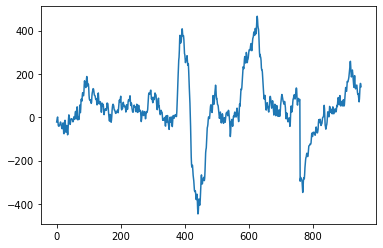

In [18]:
# X_train.iloc[0].to_numpy()
X_train.astype = int
plt.plot(X_train.iloc[5].to_numpy()[1:])

In [19]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(50, activation='relu', input_dim=dim))
# classifier.add(Dense(100, activation='relu'))
# classifier.add(Dropout(0.07))
# classifier.add(Dense(50, activation='relu' ))
# classifier.add(Dropout(0.07))
# classifier.add(Dense(20, activation='relu'))
classifier.add(Dense(1, activation='softmax'))

classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
tensorboard = TensorBoard(histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = classifier.fit(X_train_trans,y_train, batch_size=8, epochs=1, validation_data=(X_test_trans,y_test) , callbacks=[tensorboard]).history




Train on 16423 samples, validate on 4106 samples







Epoch 1/1
16423/16423 [==============================] - 5s 290us/step - loss: -55.5523 - acc: 0.1036 - val_loss: -55.8022 - val_acc: 0.0957



In [21]:
eval_model=classifier.evaluate(X_train_trans, y_train,verbose=0)
print(eval_model)

eval_model=classifier.evaluate(X_test_trans, y_test,verbose=0)
print(eval_model)

predictions=classifier.predict(X_test_trans)
# predictions =(predictions>0.80)

[-55.552268432829024, 0.1036351458375088]
[-55.80223254442099, 0.09571358986848515]


In [0]:
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right');


# fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error,pos_label=1)
# roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
# plt.legend(loc='lower right')
# plt.plot([0,1],[0,1],'r--')
# plt.xlim([-0.001, 1])
# plt.ylim([0, 1.001])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show();

In [23]:
maxlen = 952
max_features = 200
X.shape

(20529, 952)

In [24]:
from keras.preprocessing import sequence
X_train, X_test, y_train, y_test = train_test_split(X[10000:], y[10000:], test_size=0.2, random_state=42)

mms = MinMaxScaler()
X_train_trans = mms.fit_transform(X_train)
X_test_trans = mms.fit_transform(X_test)

X_train_trans = sequence.pad_sequences(pd.DataFrame(X_train_trans).to_numpy(), maxlen=maxlen)
X_test_trans = sequence.pad_sequences(pd.DataFrame(X_test_trans).to_numpy(), maxlen=maxlen)
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train shape: (8423, 952)
x_test shape: (2106, 952)


In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(y_train.reshape(-1, 1))
enc.transform( y_train.reshape(-1, 1))

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

<8423x10 sparse matrix of type '<class 'numpy.float64'>'
	with 8423 stored elements in Compressed Sparse Row format>

In [0]:
# model = Sequential()
# model.add(Embedding(max_features, 128, input_length=maxlen))
# model.add(Bidirectional(GRU(64))) # LSTM
# model.add(Dropout(0.25))
# model.add(Dense(10, activation='softmax'))
# # categorical reference https://elitedatascience.com/keras-tutorial-deep-learning-in-python

# model.compile('adam', 'categorical_crossentropy', metrics=['accuracy']) # was using binary_crossentropy



# print('Train...')

# yyy = enc.transform(y_train.reshape(-1, 1))
# yy = enc.transform(y_test.reshape(-1, 1))

# model.fit(X_train_trans, yyy,
#           batch_size=32,
#           epochs=4,
#           validation_data=[X_test_trans, yy])

In [0]:
# pred = model.predict(X_test_trans)

# eval_model=model.evaluate(X_train_trans, y_train,verbose=0)
# print(eval_model)

# eval_model=model.evaluate(X_test_trans, y_test,verbose=0)
# print(eval_model)

# predictions=model.predict(X_test_trans)
# # predictions =(predictions>0.80)

# benchmark(pred)

In [34]:
!wget https://raw.githubusercontent.com/vlawhern/arl-eegmodels/master/EEGModels.py
import EEGModels as EM


--2019-12-25 21:00:28--  https://raw.githubusercontent.com/vlawhern/arl-eegmodels/master/EEGModels.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18283 (18K) [text/plain]
Saving to: ‘EEGModels.py.2’

EEGModels.py.2      100%[===================>]  17.85K  --.-KB/s    in 0.007s  

2019-12-25 21:00:28 (2.46 MB/s) - ‘EEGModels.py.2’ saved [18283/18283]



In [61]:
# ideo from https://github.com/Cerebrock/BCI/blob/9e670f2b30cbe1e74579637bfeff1b232aa8642a/mnist.ipynb


""" Keras Implementation of EEGNet
http://iopscience.iop.org/article/10.1088/1741-2552/aace8c/meta

Inputs:
    
  nb_classes      : int, number of classes to classify
  Chans, Samples  : number of channels and time points in the EEG data
  dropoutRate     : dropout fraction
  kernLength      : length of temporal convolution in first layer. We found
                    that setting this to be half the sampling rate worked
                    well in practice. For the SMR dataset in particular
                    since the data was high-passed at 4Hz we used a kernel
                    length of 32.     
  F1, F2          : number of temporal filters (F1) and number of pointwise
                    filters (F2) to learn. Default: F1 = 8, F2 = F1 * D. 
  D               : number of spatial filters to learn within each temporal
                    convolution. Default: D = 2
  dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.

"""
from keras.layers import * # like any other bad programmer would do :) 

nb_classes =10
Chans = 64
Samples = 128
dropoutRate = 0.5
kernLength = 64
F1 = 8
D = 2
F2 = 16
norm_rate = 0.25
dropoutType = 'Dropout'

if dropoutType == 'SpatialDropout2D':
    dropoutType = SpatialDropout2D
elif dropoutType == 'Dropout':
    dropoutType = Dropout
else:
    raise ValueError('dropoutType must be one of SpatialDropout2D '
                      'or Dropout, passed as a string.')

model = Sequential()
model.add(Conv2D(F1, (1,kernLength) , padding = 'same', input_shape = (1,Chans,Samples), use_bias= False))
model.add(BatchNormalization(axis = 1))
model.add(DepthwiseConv2D((Chans, 1), use_bias = False, 
                                depth_multiplier = D,
                                depthwise_constraint = max_norm(1.)))

model.add(BatchNormalization(axis = 1))
model.add(Activation('elu'))
model.add(AveragePooling2D((1, 4)))
model.add(dropoutType(dropoutRate))

model.add(SeparableConv2D(F2, (1, 16), use_bias = False, padding = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('elu'))
model.add(AveragePooling2D((1, 8)))
model.add(dropoutType(dropoutRate))
model.add(Flatten(name = 'flatten'))
model.add(Dense(nb_classes, name = 'dense',kernel_constraint = max_norm(norm_rate)))
    
eegnet = Model(inputs=input1, outputs=Activation('softmax', name = 'softmax'))


' Keras Implementation of EEGNet\nhttp://iopscience.iop.org/article/10.1088/1741-2552/aace8c/meta\n\nInputs:\n    \n  nb_classes      : int, number of classes to classify\n  Chans, Samples  : number of channels and time points in the EEG data\n  dropoutRate     : dropout fraction\n  kernLength      : length of temporal convolution in first layer. We found\n                    that setting this to be half the sampling rate worked\n                    well in practice. For the SMR dataset in particular\n                    since the data was high-passed at 4Hz we used a kernel\n                    length of 32.     \n  F1, F2          : number of temporal filters (F1) and number of pointwise\n                    filters (F2) to learn. Default: F1 = 8, F2 = F1 * D. \n  D               : number of spatial filters to learn within each temporal\n                    convolution. Default: D = 2\n  dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.\n\n'

ValueError: ignored

In [48]:
eegnet.compile(loss="categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

model.fit(X_train, y_train, batch_size = 256, validation_split=0.1, epochs = 100)

ValueError: ignored